In [2]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# Visualisasi Hasil All Data

### Mengimport Dataset Penuh

In [3]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_all_selected.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8d7ef114-6f71-4636-b310-74bee64c4486,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Setiap apply lamaran disini, bbrpa hari atau b...",1,0,14.33.0,2024-12-12 08:14:23,NaN,NaN,14.33.0
1,5346efe6-db13-40d4-a928-53197f078601,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"min tolong ini ngebug, masa pas mau buka lowon...",3,0,14.33.0,2024-12-12 07:29:09,NaN,NaN,14.33.0
2,290afc12-8677-4436-a8b1-0b210794bdf7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Worth it,2,0,14.33.0,2024-12-12 04:27:59,NaN,NaN,14.33.0
3,4bc5e44e-13f9-43fd-ad80-f8f204d0f186,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Jadi susah re login by seek, gagal terus",1,0,14.32.0,2024-12-11 23:41:41,NaN,NaN,14.32.0
4,f38fa028-5260-441a-938c-2925ea8da6ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,1,0,14.32.0,2024-12-11 22:51:25,"Hi, kami meminta maaf atas ketidaknyamanan yan...",2024-12-04 08:43:34,14.32.0


### Menghitung Jumlah Baris

In [4]:
len(df.index)

73990

### Mengurutkan Data Berdasarkan Date

In [5]:
new_df = df[['userName', 'score', 'at', 'content']]
my_df = new_df.sort_values(by=['at'], ascending=False)

my_df.head()

,userName,score,at,content
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b..."
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon..."
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus"
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...


### Menampilkan Informasi Dataset

In [6]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73990 entries, 0 to 73989
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  73990 non-null  object
 1   score     73990 non-null  int64 
 2   at        73990 non-null  object
 3   content   73981 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [7]:
my_df.describe()

,score
count,73990.000000
mean,4.355332
std,1.209361
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menghapus Baris my_df yang NULL

In [8]:
my_df = my_df.dropna()
my_df.isnull().sum()

userName    0
score       0
at          0
content     0
dtype: int64

### Menghitung Jumlah Baris setelah NULL Dihilangkan

In [9]:
len(my_df)

73981

In [10]:
df = my_df

In [11]:
len(df.index)

73981

## Preprocessing Data

### a. Casefolding

In [12]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [13]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']

0        setiap apply lamaran disini, bbrpa hari atau b...
1        min tolong ini ngebug, masa pas mau buka lowon...
2                                                 worth it
3                 jadi susah re login by seek, gagal terus
4        tolong di perbaiki masalah yang ada di aplikas...
                               ...                        
73985                             good luck for us all....
73986                                                  top
73987                                                   ok
73988                                 thanks for the job..
73989    nice app, runing on my gio. but somehow thing ...
Name: text_clean, Length: 73981, dtype: object

In [14]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,userName,score,at,content,text_clean
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...


### b. Filtering

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,userName,score,at,content,text_clean,text_Stopword
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...


### c. Tokenizing

In [16]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,userName,score,at,content,text_clean,text_Stopword,text_tokens
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"[apply, lamaran, bbrpa, bbrpa, minggu, balasan..."
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"[min, tolong, ngebug, pas, buka, lowongan, mut..."
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"[worth, it]"
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"[susah, re, login, by, seek, gagal]"
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"[tolong, perbaiki, aplikasi, login, eror, gaus..."


### d. Stemming

In [17]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [19]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head()


22050
------------------------
1 : apply : apply
2 : lamaran : lamar
3 : bbrpa : bbrpa
4 : minggu : minggu
5 : balasan : balas
6 : stiap : stiap
7 : perusaahan : perusaahan
8 : pekerjaan : kerja
9 : kadaluwarsatutup : kadaluwarsatutup
10 : gtu : gtu
11 : beda : beda
12 : apk : apk
13 : lulus : lulus
14 : mkanya : mkanya
15 : jarang : jarang
16 : kali : kali
17 : buka : buka
18 : jobstreet : jobstreet
19 : min : min
20 : tolong : tolong
21 : ngebug : ngebug
22 : pas : pas
23 : lowongan : lowong
24 : muter : muter
25 : si : si
26 : make : make
27 : wifi : wifi
28 : aplikasi : aplikasi
29 : lancar : lancar
30 : udh : udh
31 : masuk : masuk
32 : tetep : tetep
33 : gabisa : gabisa
34 : ngalamar : ngalamar
35 : worth : worth
36 : it : it
37 : susah : susah
38 : re : re
39 : login : login
40 : by : by
41 : seek : seek
42 : gagal : gagal
43 : perbaiki : baik
44 : eror : eror
45 : gausah : gausah
46 : suruh : suruh
47 : screenshotan : screenshotan
48 : kasih : kasih
49 : buktii : bukti
50 : gaa

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"[apply, lamaran, bbrpa, bbrpa, minggu, balasan...",apply lamar bbrpa bbrpa minggu balas stiap per...
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"[min, tolong, ngebug, pas, buka, lowongan, mut...",min tolong ngebug pas buka lowong muter muter ...
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"[worth, it]",worth it
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"[susah, re, login, by, seek, gagal]",susah re login by seek gagal
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"[tolong, perbaiki, aplikasi, login, eror, gaus...",tolong baik aplikasi login eror gausah suruh s...


In [20]:
data_clean.to_csv('sample_data/the_data_all_hasiltextpreprocessing.csv', index=False)

## Data Extracting

In [21]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

data_real = pd.read_csv('sample_data/the_data_all_hasiltextpreprocessing.csv')
data_real = pd.DataFrame(data_real)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']
C = data_real['text_tokens_stemmed']

### Menghitung Jumlah Baris data_real

In [22]:
len(data_real)

73981

### Drop Kolom data_clean yang Tidak Digunakan

In [23]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')
C = C.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)
C_tfid = tfid_vectorizer.transform(C)

In [25]:
print(A.shape)
print(A_tfid.shape)
print(C.shape)
print(C_tfid.shape)

(2753,)
(2753, 3937)
(73981,)
(73981, 3937)


In [26]:
A_tfid.toarray()
C_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## a. Naive Bayes (NB)

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [28]:
C_pred = nb.predict(C_tfid)
data_real['Label NB'] = C_pred
data_real = pd.DataFrame(data_real)
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_NB.csv', index=False)

data_real.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif


In [29]:
dr = pd.read_csv('sample_data/the_data_all_hasil_sentimen_NB.csv')
dr.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif


## b. Support Vector Machine (SVM)

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

C_pred = svm.predict(C_tfid)
data_real['Label SVM'] = C_pred
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_SVM.csv', index=False)
data_real.head()

Accuracy for C=0.01: 0.887032328369052
Accuracy for C=0.05: 0.9171812568107519
Accuracy for C=0.25: 0.9505993461678169
Accuracy for C=0.5: 0.966581910642935
Accuracy for C=0.75: 0.974573192880494
Accuracy for C=1: 0.9785688339992735


,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB,Label SVM
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif,negatif


### Memasukkan Data Prediksi NB dan SVM ke CSV

In [31]:
data_real.to_csv('sample_data/the_data_all_hasil_sentimen_NB_dan_SVM.csv', index=False)

### Mengitung Label Prediksi

In [32]:
# hitung label positif
positif = dr[dr['Label NB'] == "positif"]
print('Label Positif :', len(positif))

# hitung label negatif
negatif = dr[dr['Label NB'] == "negatif"]
print('Label Negatif :', len(negatif))

# totalkan
total = len(dr)
print('Total :', total)

Label Positif : 61946
Label Negatif : 12035
Total : 73981


### Barplot Label Prediksi

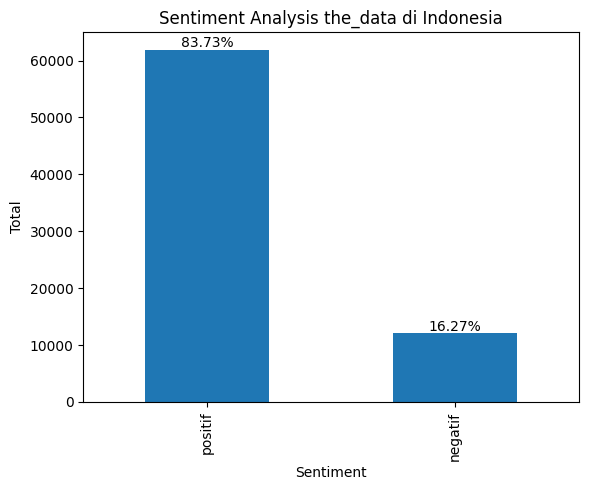

In [33]:
import matplotlib.pyplot as plt

# Convert 'at' column to datetime and sort by date
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Format the date to 'YYYY-MM-DD' and convert back to datetime
dr['date'] = dr['date'].dt.strftime('%Y-%m-%d')
dr['date'] = pd.to_datetime(dr['date'])

# Calculate value counts and percentages
value_counts = dr['Label NB'].value_counts()
percentages = value_counts / value_counts.sum() * 100

# Plot bar chart with percentages
ax = value_counts.plot(kind='bar')
for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
    ax.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Sentiment Analysis the_data di Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.show()

### Linechart dengan Tanggal

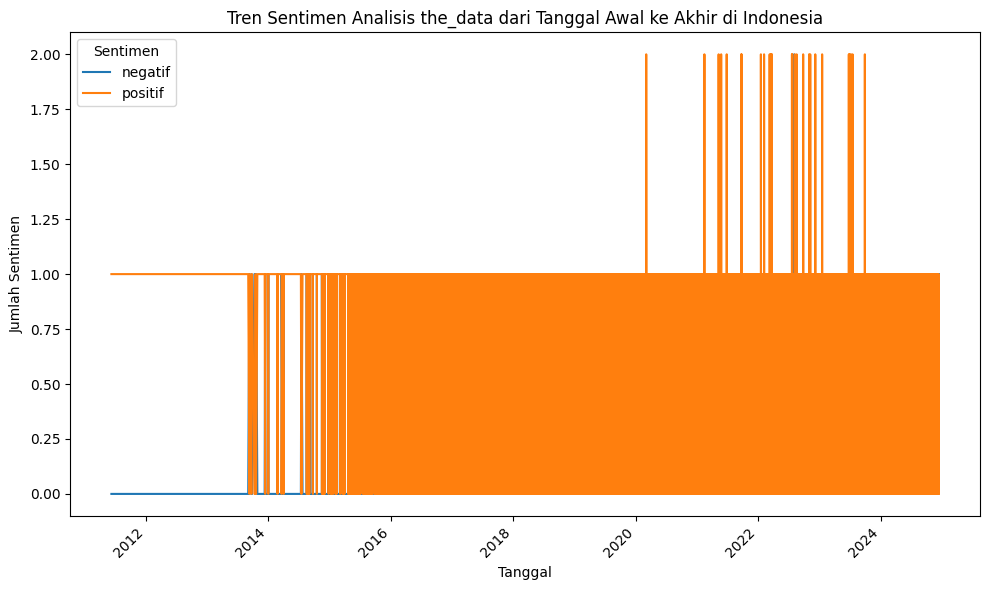

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Agregasi jumlah sentimen per tanggal
sentiment_per_day = dr.groupby(['date', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_day.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis the_data dari Tanggal Awal ke Akhir di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()


### Linechart dengan Bulan

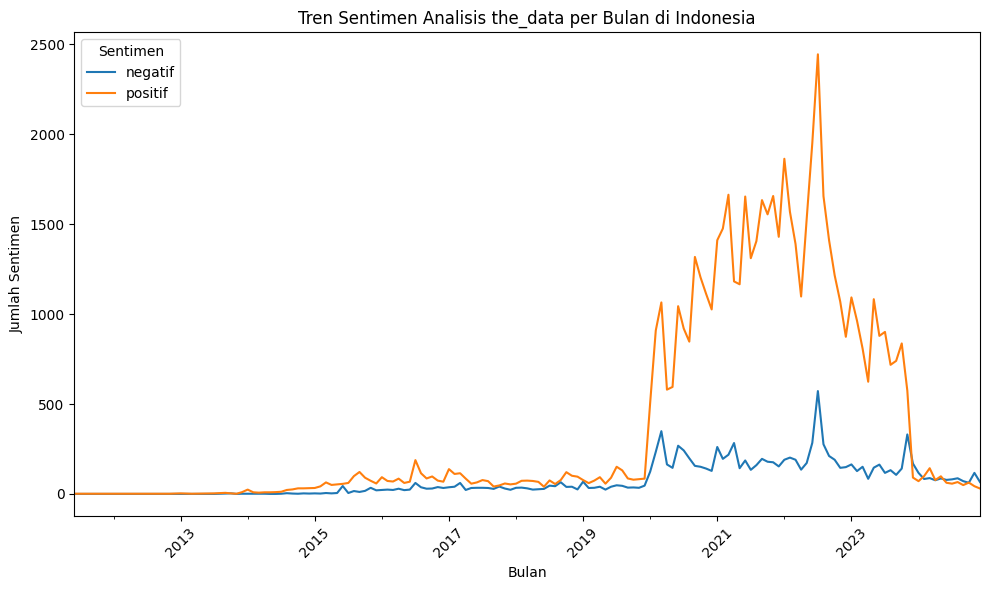

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Tambahkan kolom bulan (format YYYY-MM)
dr['month'] = dr['date'].dt.to_period('M')

# Agregasi jumlah sentimen per bulan
sentiment_per_month = dr.groupby(['month', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_month.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis the_data per Bulan di Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()
